# **Classification Using Logistic Regression**
## **Introduction**
In this lab, we apply Logistic Regression, a supervised learning algorithm, to classify different types of wine using the Wine dataset from sklearn.datasets. The dataset contains chemical properties of wine samples, categorized into three classes.

## **Methodology**
1. **Data Preprocessing:**

    - Loaded the Wine dataset from sklearn.datasets.
    - Split the data into training (80%) and testing (20%) sets.
    - Standardized the features using StandardScaler() to improve model performance.
2. **Model Training & Evaluation:**
    - Trained a Logistic Regression model on the training data.
    - Evaluated the model using accuracy, precision, recall, and F1-score.
    - Used a confusion matrix to analyze classification performance.


In [27]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize, StandardScaler



import seaborn as sns

In [28]:
from sklearn.datasets import load_wine

In [29]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target  # Add target column

In [30]:
df_target = pd.get_dummies(df['target'])  # One-hot encoding
df = df.drop(columns=['target'])  # Drop original target column

In [31]:

df.head

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3, random_state=42)


In [34]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
138,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0
93,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0
106,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
92,12.69,1.53,2.26,20.7,80.0,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495.0


In [35]:
y_train


,0,1,2
138,False,False,True
104,False,True,False
78,False,True,False
36,True,False,False
93,False,True,False
...,...,...,...
71,False,True,False
106,False,True,False
14,True,False,False
92,False,True,False


In [36]:
y_train = np.argmax(y_train.values, axis=1)  # If y_train is a DataFrame


In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/pujan/datascience/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=model.predict(X_test)
y_pred_prob =model.predict_proba(X_test)[:,1]

In [39]:
y_pred_prob

array([1.19535376e-02, 5.66784309e-04, 1.95629962e-01, 2.81022965e-04,
       9.80353681e-01, 8.72117428e-05, 9.92903188e-01, 1.63417735e-04,
       9.39504485e-01, 2.48432162e-02, 5.93035040e-01, 8.73320938e-05,
       2.01561157e-03, 9.62980562e-01, 2.59532150e-06, 9.99900691e-01,
       9.98407048e-01, 9.98286966e-01, 2.94488592e-04, 9.99671761e-01,
       1.18189360e-09, 9.33335044e-01, 8.17120646e-01, 1.45724127e-05,
       6.83633776e-06, 1.60485449e-05, 9.99937821e-01, 6.91314828e-01,
       9.97301530e-01, 1.19671465e-03, 8.58419273e-03, 9.99969874e-01,
       6.34720614e-02, 3.23391114e-07, 1.23446315e-05, 2.74485082e-04,
       1.09618596e-06, 5.43635498e-03, 7.24480829e-01, 4.29601625e-06,
       1.15992353e-02, 9.99905092e-01, 9.99525876e-01, 8.92850526e-01,
       2.15758994e-01, 9.88982104e-05, 7.16904743e-01, 9.99048947e-01,
       8.60125476e-04, 6.26997994e-05, 9.95704177e-01, 4.23240508e-03,
       1.29500956e-04, 1.07327252e-06])

In [43]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [45]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred,average="micro")
recall = recall_score(y_test,y_pred, average='macro')

print(f"Accuracy:{accuracy:.2f}\nprecision = {precision:.2f}\nrecall={recall:.2f}")

Accuracy:0.98
precision = 0.98
recall=0.98


In [46]:

y_test


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [47]:
y_pred_prob


array([1.19535376e-02, 5.66784309e-04, 1.95629962e-01, 2.81022965e-04,
       9.80353681e-01, 8.72117428e-05, 9.92903188e-01, 1.63417735e-04,
       9.39504485e-01, 2.48432162e-02, 5.93035040e-01, 8.73320938e-05,
       2.01561157e-03, 9.62980562e-01, 2.59532150e-06, 9.99900691e-01,
       9.98407048e-01, 9.98286966e-01, 2.94488592e-04, 9.99671761e-01,
       1.18189360e-09, 9.33335044e-01, 8.17120646e-01, 1.45724127e-05,
       6.83633776e-06, 1.60485449e-05, 9.99937821e-01, 6.91314828e-01,
       9.97301530e-01, 1.19671465e-03, 8.58419273e-03, 9.99969874e-01,
       6.34720614e-02, 3.23391114e-07, 1.23446315e-05, 2.74485082e-04,
       1.09618596e-06, 5.43635498e-03, 7.24480829e-01, 4.29601625e-06,
       1.15992353e-02, 9.99905092e-01, 9.99525876e-01, 8.92850526e-01,
       2.15758994e-01, 9.88982104e-05, 7.16904743e-01, 9.99048947e-01,
       8.60125476e-04, 6.26997994e-05, 9.95704177e-01, 4.23240508e-03,
       1.29500956e-04, 1.07327252e-06])

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)


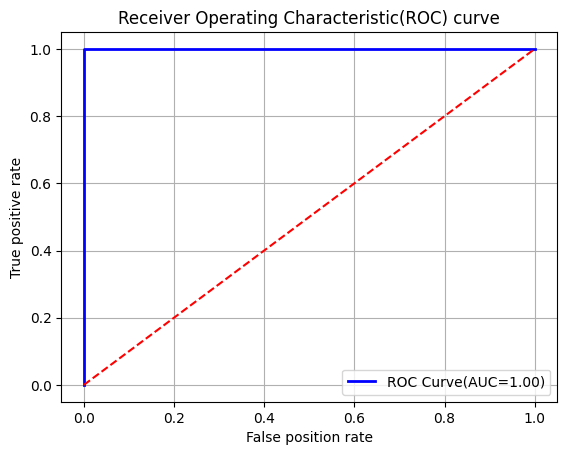

In [49]:
plt.Figure(figsize=(10,6))
plt.plot(fpr,tpr,color="blue",lw=2,label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color="red",linestyle="--")
plt.xlabel("False position rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic(ROC) curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## **Results**
The model achieved an impressive accuracy of 98%, along with precision and recall both at 98%. This indicates excellent performance in classifying wine types with minimal errors. The use of feature scaling improved stability. To further enhance the model, hyperparameter tuning or exploring alternative models like SVM and Random Forest could be considered.

## **Conclusion**
**Logistic Regression** is a powerful yet simple algorithm for classifying wine types based on chemical composition. While effective, other models like Random Forest or SVM could be explored for potentially higher accuracy.

